In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from mpl_toolkits.mplot3d import Axes3D

In [2]:
or1 = r"C:\Users\Gabriel Ullmann\Desktop\all_tcc_results\online_retail1\best-seller\online_retail_g_amounts.csv"
or2 = r"C:\Users\Gabriel Ullmann\Desktop\all_tcc_results\online_retail2\best-seller\online_retail2_g_amounts.csv"
olist = r"C:\Users\Gabriel Ullmann\Desktop\all_tcc_results\olist\best-seller\olist_g_amounts.csv"

## Análise geral

In [3]:
npd = pd.read_csv(or2, sep=",")
len(npd)

9541831

In [11]:
len(npd[(npd.amount > 0)])

9541831

In [12]:
(8862899/9541831) * 100

92.88467800362426

In [6]:
len(npd['amount'].value_counts().values)

909

In [4]:
npd = npd[['client_id', 'product_id', 'rating','amount']]
npd_filtered = npd[(npd.amount > 400)]
len(npd_filtered)

97760

## Correlação entre ratings e volume vendido por produto/segmento

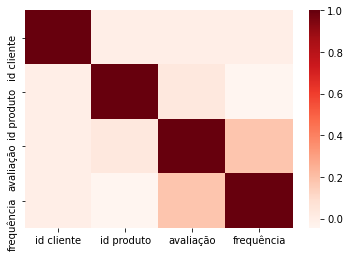

In [8]:
npd = npd[['client_id', 'product_id', 'rating','amount']]
npd.columns = ['id cliente', 'id produto', 'avaliação','frequência']
cor2 = npd.corr()
sns.heatmap(cor2, cmap="Reds")

## Histograma: avaliações

In [9]:
npd2 = npd #filtro temp

<Figure size 864x576 with 0 Axes>

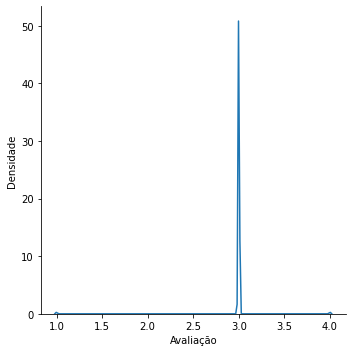

In [10]:
plt.figure(figsize=(12,8))
sns.displot(npd2["avaliação"], kind="kde").set_axis_labels('Avaliação', 'Densidade')

## Histograma: volume de vendas

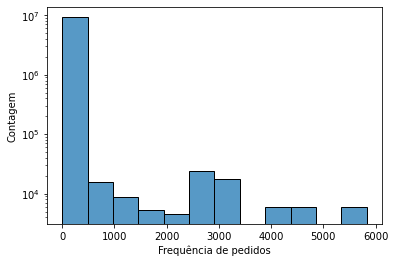

In [14]:
#plt.xlim(0, 550)
#plt.xlabel('Frequência de pedidos')
#plt.ylabel('Contagem')
#sns.histplot(npd2["frequência"], stat="count", kde=False)

plt.yscale("log")
plt.xlabel('Frequência de pedidos')
plt.ylabel('Contagem')
sns.histplot(npd2["frequência"], stat="count", bins=12, kde=False)

In [102]:
sns.displot(npd2["frequência"], kind="ecdf")

KeyError: 'amount'

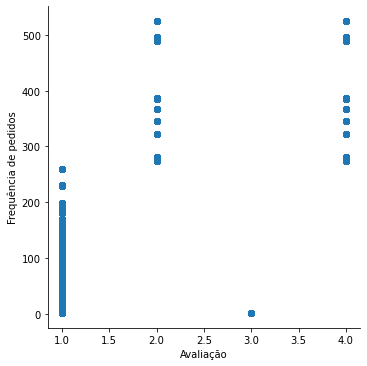

In [103]:
sns.lmplot(x="avaliação", y="frequência", data=npd2, fit_reg=False).set_axis_labels('Avaliação', 'Frequência de pedidos')

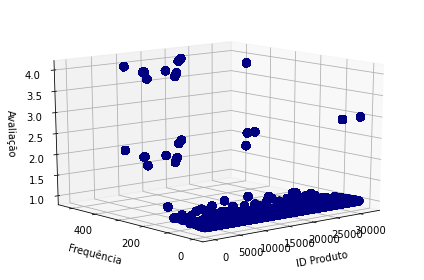

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(npd2['id produto'], npd2['frequência'], npd2['avaliação'], c='navy', s=60)
ax.view_init(15, 230)

ax.set_xlabel('ID Produto', labelpad=10)
ax.set_ylabel('Frequência', labelpad=10)
ax.set_zlabel('Avaliação')

plt.tight_layout()
for label in ax.get_yaxis().get_ticklabels()[::2]:
    label.set_visible(False)
plt.show()

In [ ]:
a = 1